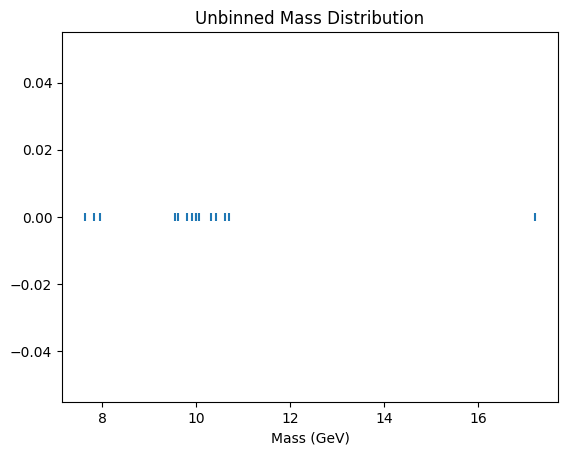

Text(0, 0.5, 'Counts')

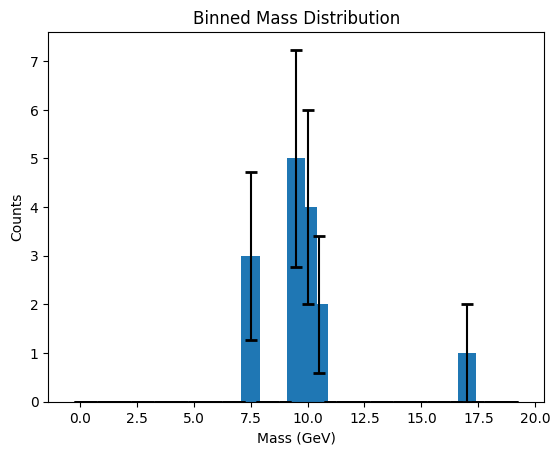

In [10]:
import matplotlib.pyplot as plt
import numpy as np
mass = np.array([7.95442531, 10.60408232, 9.9020277, 10.42288788, 17.2193401, 10.06076572,
                 10.00176003, 7.8289388, 9.55481385, 9.99981543, 10.3156156, 10.70547087,
                 9.80374407, 7.62085689, 9.60747351])
#Unbinned
plt.scatter(mass,[0]*len(mass),marker='|')
plt.title('Unbinned Mass Distribution')
plt.xlabel('Mass (GeV)')
plt.show()
#Binned
hist, bin_edges = np.histogram(mass, bins=np.arange(0, 20, 0.5))
plt.bar(bin_edges[:-1], hist, yerr=np.sqrt(hist), error_kw={'capsize': 4, 'capthick': 2})
plt.title('Binned Mass Distribution')
plt.xlabel('Mass (GeV)')
plt.ylabel('Counts')

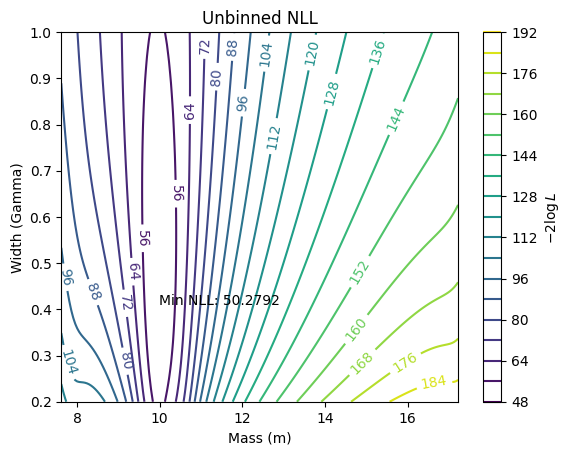

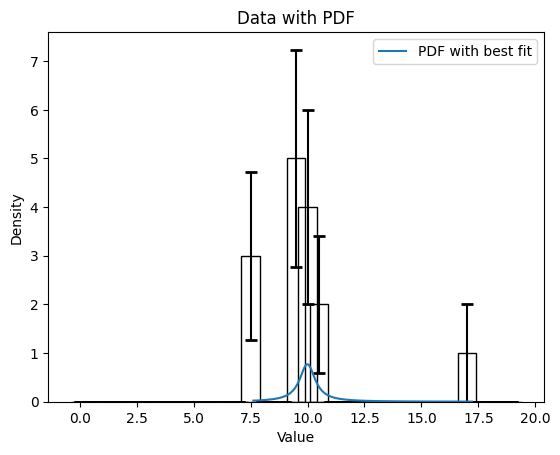

In [42]:
from scipy.optimize import minimize
from scipy.stats import cauchy


# Defined negative log-likelihood function
def negloglike(params,data):
    m, gamma = params
    nll = -np.sum(cauchy.logpdf(mass, loc=m, scale=gamma))
    return 2 * nll

# Minimization
initial_guess = [np.mean(mass), np.std(mass)]  # Initial guess for parameters
result = minimize(negloglike, initial_guess, args=(mass), method='Nelder-Mead')
m0, gamma0 = result.x

# Plotting the NLL w/ parameters
m_vals = np.linspace(np.min(mass), np.max(mass), 200)
gamma_vals = np.linspace(0.2, 1, 200)

#Conversion to matrix
M, gamma = np.meshgrid(m_vals, gamma_vals)
#Creation of holding array
NLL = np.zeros_like(M)
#Putting values through calculations
for i in range(len(M)):
    for j in range(len(M[i])):
        NLL[i, j] = negloglike((M[i,j], gamma[i,j]), mass)
#Contour plot
plt.figure()
contours = plt.contour(M, gamma, NLL, levels=20)
plt.colorbar(contours, label=r'$-2\log L$')
plt.clabel(contours)
plt.text(m0,gamma0,f'Min NLL: {NLL.min():.4f}')
plt.xlabel('Mass (m)')
plt.ylabel('Width (Gamma)')
plt.title('Unbinned NLL')

# Mass distribution plot w/ superposed PDF
plt.figure()
hist, bin_edges = np.histogram(mass, bins=np.arange(0, 20, 0.5))
plt.bar(bin_edges[:-1], hist, yerr=np.sqrt(hist), error_kw={'capsize': 4, 'capthick': 2},fill=False)
x = np.linspace(min(mass), max(mass), 100)
plt.plot(x, cauchy.pdf(x, loc=m0, scale=gamma0), label='PDF with best fit')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Data with PDF')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


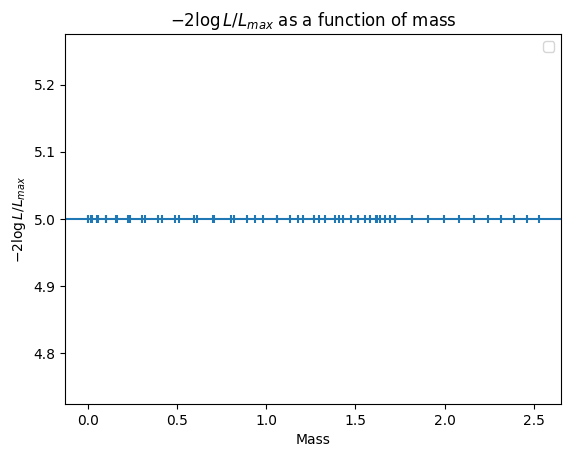

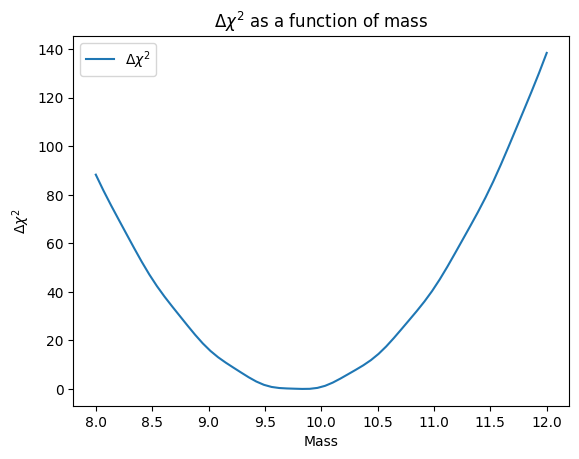

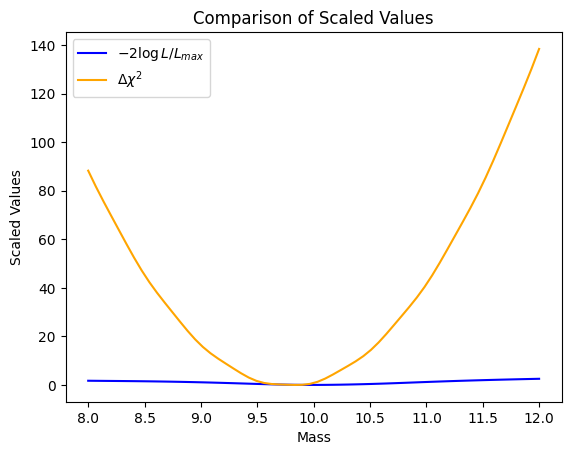

In [58]:
#1D Mass Function for Task 3
massval = np.linspace(8,12,60)

plt.figure()
plt.scatter(scalednll,[5]*len(scalednll),marker='|')
plt.xlabel('Mass')
plt.ylabel(r'$-2\log L/L_{max}$')
plt.title(r'$-2\log L/L_{max}$ as a function of mass')
plt.axhline(y=5)
plt.legend()

#Binned Chi2
Lmax = np.sum(cauchy.logpdf(mass,m0,gamma0))
hist, binedge = np.histogram(mass, bins=np.arange(0,20.5,0.5))
bincenter = 0.5 * (binedge[1:]+binedge[:-1])
logL=NLL[0]/Lmax
LogL = logL - np.min(logL) * 7


def binnedchi2(m,data,bins):
    hist, _ = np.histogram(data,bins=bins)
    expectation = cauchy.pdf(bincenter,loc=m,scale=gamma0)*len(data)
    return np.sum((hist - expectation) ** 2/expectation)

chi2val = np.array([binnedchi2(m,mass,binedge) for m in massval])
chi2min = np.min(chi2val)
deltachi2 = chi2val - chi2min

#deltachi2 plotting
plt.figure()
plt.plot(massval,deltachi2,label=r'$\Delta \chi^2$')
plt.xlabel('Mass')
plt.ylabel(r'$\Delta \chi^2$')
plt.title(r'$\Delta \chi^2$ as a function of mass')
plt.legend()

#Superpositioning
plt.figure()
plt.plot(massval, scalednll, label=r'$-2\log L/L_{max}$', color='blue')
plt.plot(massval, deltachi2, label=r'$\Delta \chi^2$', color='orange')
plt.xlabel('Mass')
plt.ylabel('Scaled Values')
plt.title('Comparison of Scaled Values')
plt.legend()
plt.show()

In [64]:
from iminuit import Minuit
def nll(m: float, gamma: float):
    return -np.sum(cauchy.logpdf(mass, m, gamma)**2)
m = Minuit(nll,m=10,gamma=1,name=('m','gamma'))
print(m.migrad())

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -1.09e+05                  │              Nfcn = 425              │
│ EDM = 0.0474 (Goal: 0.0002)      │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────